In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
data = pd.read_csv('data/raw-data.csv')
data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Initial,3.5,73,242,15,5,5
1,1,1,2,1,Result,5.8,137,68,17,6,8
2,1,1,2,2,Initial,4.0,44,305,22,5,3
3,1,1,2,2,Result,5.1,3,211,19,0,7
4,1,1,2,3,Initial,4.2,127,156,25,3,5


In [10]:
initial_data = data[data['Stage'] == 'Initial']
result_data = data[data['Stage'] == 'Result']

initial_data = initial_data.reset_index(drop=True)
result_data = result_data.reset_index(drop=True)

result_data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Result,5.8,137,68,17,6,8
1,1,1,2,2,Result,5.1,3,211,19,0,7
2,1,1,2,3,Result,5.2,203,50,7,5,8
3,1 & 2,0,2,1,Result,8.0,63,30,14,5,8
4,1 & 2,0,2,2,Result,8.4,58,25,8,9,8


In [48]:
difference_data = pd.DataFrame(columns=list(data))
difference_data['Options'] = result_data['Options']
difference_data['P-Treatment'] = result_data['P-Treatment']
difference_data['N-Treatment'] = result_data['N-Treatment']
difference_data['Trial'] = result_data['Trial']
difference_data['Stage'] = 'Difference'

# difference_data['Dissolved O2'] = result_data['Dissolved O2'] - initial_data['Dissolved O2']
# difference_data['Greens'] = result_data['Greens'] - initial_data['Greens']
# difference_data['Cyanbacteria'] = result_data['Cyanbacteria'] - initial_data['Cyanbacteria']
# difference_data['Daphnia'] = result_data['Daphnia'] - initial_data['Daphnia']
# difference_data['Bosmina'] = result_data['Bosmina'] - initial_data['Bosmina']
# difference_data['Trout'] = result_data['Trout'] - initial_data['Trout']

difference_data['Dissolved O2'] = (result_data['Dissolved O2'] - initial_data['Dissolved O2']) / initial_data['Dissolved O2']
difference_data['Greens'] = (result_data['Greens'] - initial_data['Greens']) / initial_data['Greens']
difference_data['Cyanbacteria'] = (result_data['Cyanbacteria'] - initial_data['Cyanbacteria']) / initial_data['Cyanbacteria']
difference_data['Daphnia'] = (result_data['Daphnia'] - initial_data['Daphnia']) / initial_data['Daphnia']
difference_data['Bosmina'] = (result_data['Bosmina'] - initial_data['Bosmina']) / initial_data['Bosmina']
difference_data['Trout'] = (result_data['Trout'] - initial_data['Trout']) / initial_data['Trout']

difference_data.head()

,Options,P-Treatment,N-Treatment,Trial,Stage,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,1,2,1,Difference,0.657143,0.876712,-0.719008,0.133333,0.200000,0.600000
1,1,1,2,2,Difference,0.275000,-0.931818,-0.308197,-0.136364,-1.000000,1.333333
2,1,1,2,3,Difference,0.238095,0.598425,-0.679487,-0.720000,0.666667,0.600000
3,1 & 2,0,2,1,Difference,2.076923,1.250000,-0.910979,0.000000,0.000000,0.600000
4,1 & 2,0,2,2,Difference,0.866667,-0.472727,-0.852071,-0.619048,-0.181818,0.600000


In [49]:
mean_data = pd.DataFrame(columns=list(data))
mean_data = mean_data.drop(['P-Treatment', 'N-Treatment', 'Stage', 'Trial'], axis=1)

mean_data['Options'] = difference_data['Options'].unique()

mean_data.head()

,Options,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1 & 2,NaN,NaN,NaN,NaN,NaN,NaN
2,1 & 3,NaN,NaN,NaN,NaN,NaN,NaN
3,"1, 3 & 4",NaN,NaN,NaN,NaN,NaN,NaN
4,3 & 4,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
for i, option in enumerate(mean_data['Options']):
    temp = difference_data[difference_data['Options'] == option]
    for j, species in enumerate(list(mean_data)):
        if species != 'Options':
            mean_data.at[i, species] = temp[species].mean()
        if species == 'Dissolved O2':
            oxygen_data = result_data[result_data['Options'] == option]
            mean_data.at[i, species] = oxygen_data[species].mean()
mean_data

,Options,Dissolved O2,Greens,Cyanbacteria,Daphnia,Bosmina,Trout
0,1,5.36667,0.181106,-0.568897,-0.24101,-0.0444444,0.844444
1,1 & 2,8.03333,0.825758,-0.88422,-0.478279,0.939394,0.525
2,1 & 3,5.5,-0.0228997,-0.426695,0.157427,0.444444,-0.259259
3,"1, 3 & 4",4.83333,0.125556,-0.268453,-0.385185,0.142857,0.0301587
4,3 & 4,3.56667,-0.593043,0.619528,-0.625926,1.1,1
5,3,3.76667,0.571877,0.120829,-0.437162,1.66667,0.233333
6,"1, 2, & 3",7.43333,3.85823,-0.871697,-0.752222,3.77778,0.484127
7,"1, 2, 3, & 4",7.76667,1.0284,-0.829786,-0.477702,2.27778,0.238095


## Visualization

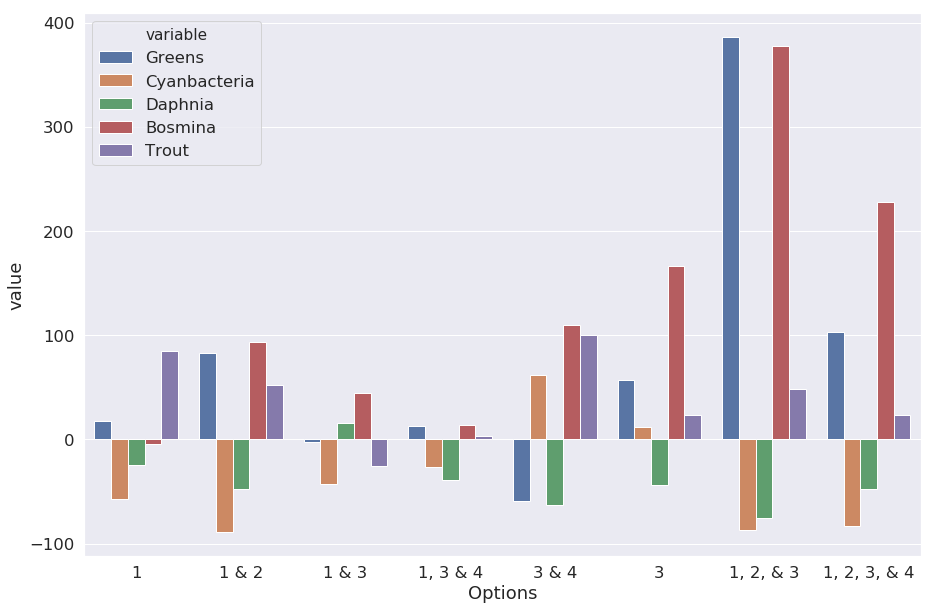

In [57]:
temp = mean_data.drop('Dissolved O2', axis=1)
temp = temp.melt(id_vars='Options')
temp['value'] = temp['value'] * 100
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.barplot(x='Options', y='value', hue='variable', data=temp)

In [54]:
temp

,Options,variable,value
0,1,Dissolved O2,5.36667
1,1 & 2,Dissolved O2,8.03333
2,1 & 3,Dissolved O2,5.5
3,"1, 3 & 4",Dissolved O2,4.83333
4,3 & 4,Dissolved O2,3.56667
5,3,Dissolved O2,3.76667
6,"1, 2, & 3",Dissolved O2,7.43333
7,"1, 2, 3, & 4",Dissolved O2,7.76667
8,1,Greens,0.181106
9,1 & 2,Greens,0.825758
